In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3083,ham,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...,NaN,NaN,NaN
3271,ham,"MOON has come to color your dreams, STARS to m...",NaN,NaN,NaN
4883,ham,For many things its an antibiotic and it can b...,NaN,NaN,NaN
4889,ham,Sounds like there could be a lot of time spent...,NaN,NaN,NaN
1381,ham,We spend our days waiting for the ideal path t...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing 
# 4. Model building
# 5. Improvement
# 6. Deploy

1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
5277,ham,"Best msg: It's hard to be with a person, when ..."
1224,spam,You are a winner U have been specially selecte...
585,ham,Tell them u have a headache and just want to u...
1957,ham,Take something for pain. If it moves however t...
2669,spam,we tried to contact you re your response to ou...


In [9]:
#renaming the col
df.rename(columns={'v1' : 'Target', 'v2':'Text'},inplace=True)

In [10]:
df.sample(5)

,Target,Text
2982,ham,What should i eat fo lunch senor
4615,ham,ÌÏ called dad oredi...
3933,ham,How come guoyang go n tell her? Then u told her?
1080,ham,You tell what happen dont behave like this to ...
2609,ham,"Awesome, text me when you're restocked"


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['Target'] = encoder.fit_transform(df['Target'])

In [13]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
# Check for duplicate values
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

EDA


In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

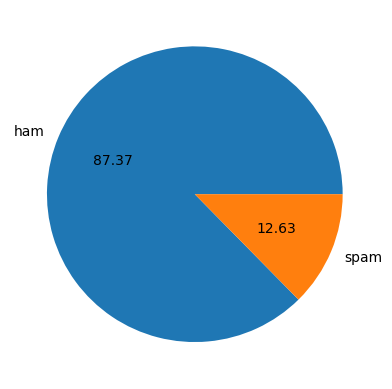

In [21]:
plt.pie(df['Target'].value_counts(),labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Abhinav
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# Number of characters
df['num_charactars']=df['Text'].apply(len)

In [25]:
#number of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
#number of sentences
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,Target,Text,num_charactars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_charactars','num_words','num_sentences']].describe()

,num_charactars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#HAM
df[df['Target']== 0][['num_charactars','num_words','num_sentences']].describe()

,num_charactars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Spam
df[df['Target']== 1][['num_charactars','num_words','num_sentences']].describe()

,num_charactars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


c:\Users\Abhinav Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhinav Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_charactars', ylabel='Count'>

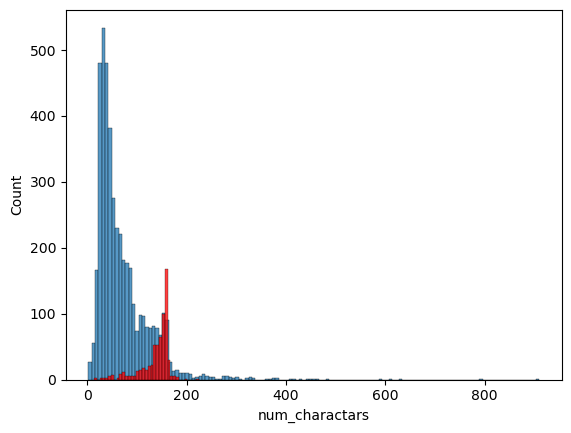

In [31]:
import seaborn as sns
sns.histplot(df[df['Target']==0]['num_charactars'])
sns.histplot(df[df['Target']==1]['num_charactars'],color='red')

c:\Users\Abhinav Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhinav Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

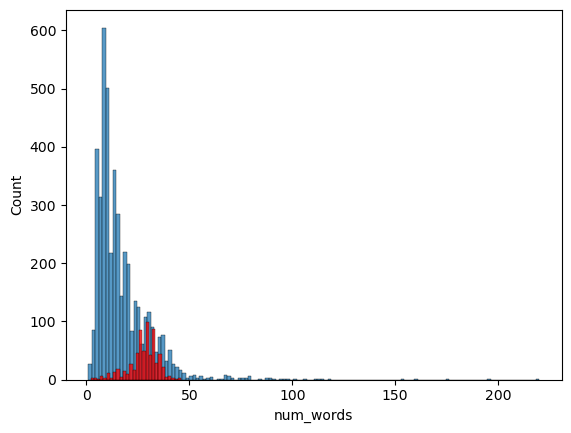

In [32]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

c:\Users\Abhinav Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhinav Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhinav Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


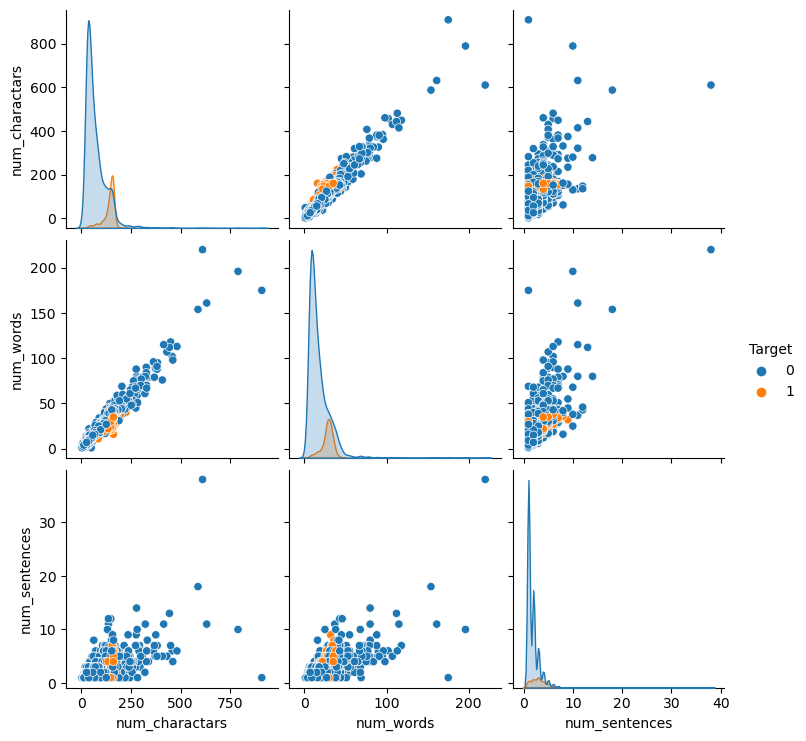

In [33]:
sns.pairplot(df,hue='Target')

<Axes: >

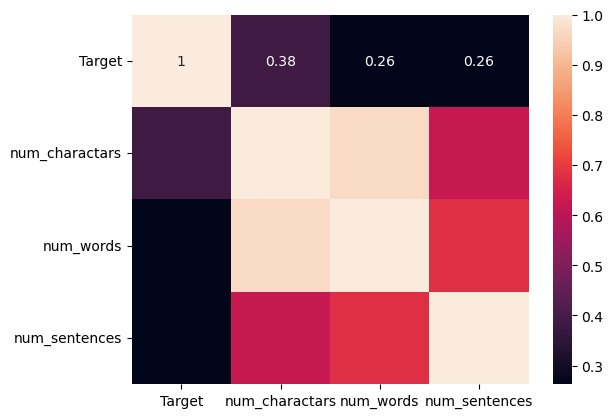

In [34]:
sns.heatmap(df[['Target','num_charactars','num_words','num_sentences']].corr(), annot=True)

3. Data Preprocessing


1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5.Stemming

In [35]:
import nltk
from nltk.corpus import stopwords
import string
def transfrom_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)

    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text =y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')


'danc'

In [37]:

transfrom_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...?')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [38]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
df['transformed_text']=df['Text'].apply(transfrom_text)

In [40]:
df.head()

,Target,Text,num_charactars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [42]:

from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white') 

In [43]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=""))

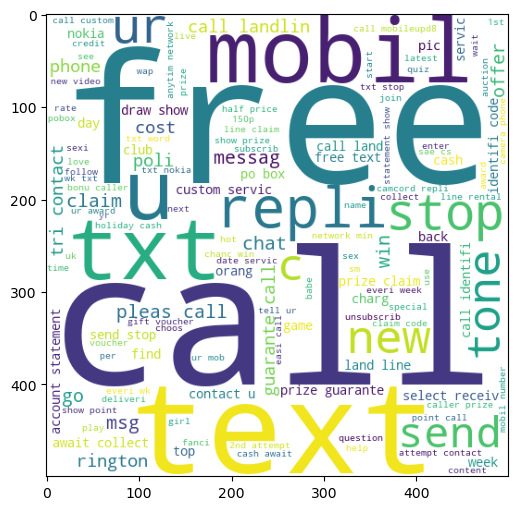

In [44]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [45]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=""))

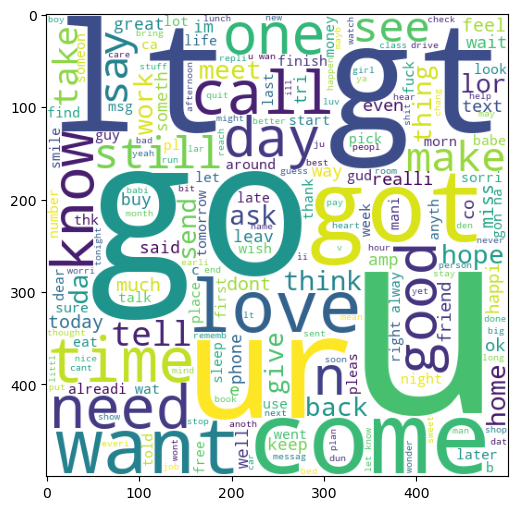

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,Target,Text,num_charactars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus =[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

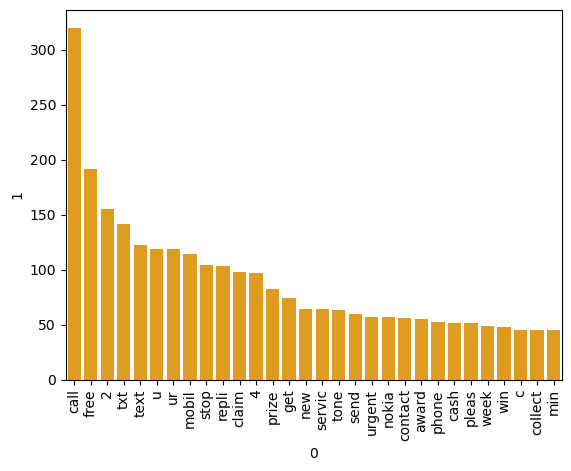

In [50]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color='Orange')
plt.xticks(rotation='vertical')
plt.show()

In [51]:
ham_corpus =[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35404

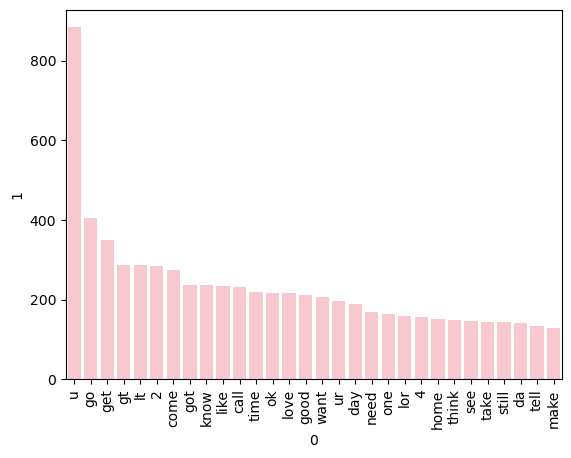

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color='Pink')
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [55]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
x.shape

(5169, 3000)

In [57]:
# from sklearn.preprocessing import MinMaxScaler 
# scaler= MinMaxScaler()
# x=scaler.fit_transform

In [58]:
#appending the num_charecter col to x
# x=np.hstack((x,df['num_charecters'].values.reshape(-1,1)))

In [59]:
y=df['Target'].values

In [60]:
from sklearn.model_selection import train_test_split
 

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [63]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [64]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [65]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [66]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [67]:
pip install scikit.learn

In [68]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc= SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier()
lrc= LogisticRegression(solver='liblinear',penalty=1)
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs={
    'SVC' : svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'RF': rfc,
    'AdaBoost' : abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb

}

In [72]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred= clf.predict(x_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [73]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores =[]

for name, clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

    print("For" ,name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9448742746615088
Precision -  0.7956204379562044
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089


In [76]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [78]:
performance_df1 =pd.melt(performance_df,id_vars="Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x='Algorithm',y='value', hue ='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Model improve
1. Change the Max-features parameter of Tfidf

In [81]:
temp_df = pd.DataFrame({'Algorithm' :clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000': precision_scores }).sort_values('Precision_max_ft_3000',ascending=False)

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [83]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [84]:
new_df_scaled=new_df.merge(temp_df, )

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [86]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled

Voting Classifier 

In [88]:
svc= SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb= MultinomialNB()
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [89]:
voting=VotingClassifier(estimators=[('svm', svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Applying Stacking


In [92]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [93]:
from sklearn.ensemble import StackingClassifier


In [94]:
clf= StackingClassifier(estimators=estimators,final_estimator=final_estimator)


In [ ]:
clf.fit(x_train,y_train)
y_pred =clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(transfrom_text,open('preprocess.pkl','wb'))